In [2]:
! git clone https://github.com/balajisrinivas/Face-Mask-Detection.git


Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 3770, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 3770 (delta 2), reused 0 (delta 0), pack-reused 3764
Receiving objects: 100% (3770/3770), 143.05 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (3840/3840), done.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D , Dropout , Flatten , Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing  import LabelBinarizer
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

  PREPROCESSING
  

In [4]:
 # define directory with the datapath where the folder is present
 DIRECTORY = r"/content/Face-Mask-Detection/dataset"
CATEGORIES = ["with_mask", "without_mask"] # with_mask and without_mask are the folders inside Directory not stored in list names CATEGORIES

In [5]:
# create two empty lists  of data and labels
data = []
labels = []

In [6]:

# looping through categories
for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)# first looping through with_mask then through without_mask in order to get the path of with_mask and without_mask
  for img in os.listdir(path): #listdir function listes down all images in the particular directory
    img_path = os.path.join(path,img)# join the patahs of the particular with_mask to the corresponding image followed my without_mask to the corresponding image
    image = load_img(img_path, target_size= (224,224)) # target size gives the height and width of the image, converting all the images to target sizeto amke them uniform
    image = img_to_array(image)
    image = preprocess_input(image) #we'll be using mobilenet model, whenever we needto use mobile net, we need to preprocess  input

    data.append(image)
    labels.append(category) # category : with_mask , without_mask
 #data list contains numerical values, labels : alphabetic values i.e with_mask, without_mask



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 data list contains numerical values, labels : alphabetic values i.e with_mask, without_mask

 To change alphabetic values of labels into numberic, we use labelBinarizer model

 hence we'll fit the labels list to this model



In [7]:

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
#convert the data and labels to numpy arrays
data = np.array(data, dtype = "float32")
label=  np.array(labels)

In [9]:
#dividing the data into train, test and split folder
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.2, random_state = 50)

THAT WAS ALL ABOUT PRE-PROCESSING






>HERE COMES TRAINING




In [10]:
#set initial learning rate: it should be less, epochs and batch size
LR = 1e-4 #learning rate
EPOCHS = 20
BatchSize = 96

In [11]:
#data Augmentation
aug = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [12]:
#Modeling
baseModel = MobileNetV2(weights = "imagenet", include_top = False , input_tensor = Input(shape=(224,224,3)))
# imagenet : pretrained mmodel for images with better weights for better results
#include_top : wheter include fullyy connected layer at the top of our network
#input_tensor : shape of the image the model is going through , here 224,224 is image size and 3 is number of input channels
#coloured images have 3 channels : R,G,B


9406464/9406464 [==============================] - 2s 0us/step


In [13]:
#constructing our fully connected layer by using pooling stuffs
headmodel = baseModel.output
headmodel = AveragePooling2D(pool_size =(7,7))(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(128,activation = "relu")(headmodel) #dense layer is 128 neurons, relu is used for non linear used cases i.e in mostly image data , we use relu activation fnction INPUT LAYER
headmodel = Dropout(0.5)(headmodel)# to avoid overfitting
headmodel = Dense(2,activation = "softmax")(headmodel)# OUTPUT LAYER consists of two layers: with_mask, without_mask ,, Activation :softmax as  it gives probability based 0s and 1s values

model = Model(inputs = baseModel.input , outputs = headmodel) # final model on which we'll work

In [14]:
# we need to freeze the initial layers in the base model so that they will not be updated in the first training process
for layer in baseModel.layers:
  layer.trainable = False

In [15]:

#compiling model
print("compiling model ....")
# we're using Adam optimizer
opt = Adam(learning_rate = LR)
model.compile(loss = "binary_crossentropy",optimizer=opt,metrics = ["accuracy"])

compiling model ....


In [16]:
#training model
H = model.fit(aug.flow(trainX,trainY, batch_size = BatchSize), steps_per_epoch=len(trainX)//BatchSize,
              validation_data = (testX, testY),validation_steps= len(testX)//BatchSize, epochs = EPOCHS)

Epoch 1/20
31/31 [==============================] - 69s 2s/step - loss: 0.5514 - accuracy: 0.7811 - val_loss: 0.3058 - val_accuracy: 0.9635
Epoch 2/20
31/31 [==============================] - 49s 2s/step - loss: 0.2740 - accuracy: 0.9347 - val_loss: 0.1666 - val_accuracy: 0.9791
Epoch 3/20
31/31 [==============================] - 46s 1s/step - loss: 0.1722 - accuracy: 0.9582 - val_loss: 0.1144 - val_accuracy: 0.9831
Epoch 4/20
31/31 [==============================] - 53s 2s/step - loss: 0.1306 - accuracy: 0.9680 - val_loss: 0.0883 - val_accuracy: 0.9857
Epoch 5/20
31/31 [==============================] - 40s 1s/step - loss: 0.1142 - accuracy: 0.9697 - val_loss: 0.0762 - val_accuracy: 0.9857
Epoch 6/20
31/31 [==============================] - 41s 1s/step - loss: 0.0859 - accuracy: 0.9768 - val_loss: 0.0658 - val_accuracy: 0.9857
Epoch 7/20
31/31 [==============================] - 41s 1s/step - loss: 0.0852 - accuracy: 0.9774 - val_loss: 0.0606 - val_accuracy: 0.9870
Epoch 8/20
31/31 [==

MAKING PREDICTIONS

In [17]:
print("EVALUAION OF NETWORK")

EVALUAION OF NETWORK


In [19]:
predIds = model.predict(testX, batch_size = BatchSize) #evaluating model
predIds = np.argmax(predIds, axis = 1) #to find index of the label to get hte highest predicted probability
print(classification_report(testY.argmax(axis=1), predIds, target_names = lb.classes_))

8/8 [==============================] - 1s 124ms/step
              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       377
without_mask       0.99      0.98      0.99       390

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [20]:
#saving the generated model
model.save("mask_detector.model" , save_format= "h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#plotting training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")


In [22]:
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

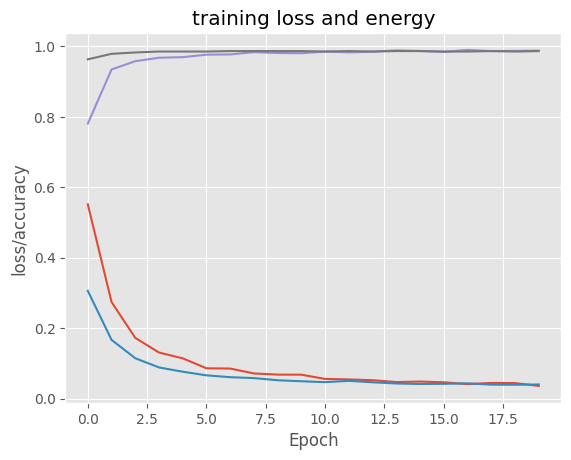

In [25]:
plt.plot(np.arange(0,N), H.history["loss"],label = "train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"],label = "val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"],label = "train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"],label = "val_acc")
plt.title("training loss and energy")
plt.xlabel("Epoch")
plt.ylabel("loss/accuracy")
#plt.legend(LOC = "lower left")
plt.savefig("plot.png")